<a href="https://colab.research.google.com/github/RubenCeV/Int-Artificial/blob/main/PIA_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividad 3: Sistema mecatrónico inteligente**

*   Rubén Alfredo Cepeda Villegas #2049124
*   Miguel Angel Quiñones Rosales #2173921
*   Tadeo Isai Sebastian Vargas #2063804
*   Andres Gael López Chairez #2023903
*   Angel Antonio Izaguirre Aguirre #2058212

Hora: N5







In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from google.colab import drive
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
# 1. Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Paso 2: Definir rutas y parámetros
data_dir = '/content/drive/MyDrive/base_recortada2'
img_size = (224, 224)
batch_size = 16
epochs = 15

print("Carpetas detectadas en la base de datos:")
print(os.listdir(data_dir))




Carpetas detectadas en la base de datos:
['Nadia (Persona non grata 2)', 'Ruben (Persona non grata 2)', 'Tadeo (Persona non grata)', 'Guardado.ipynb']


In [ ]:
# Paso 3: Generadores de imágenes

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25,
)

# El val_datagen debe ser EXACTAMENTE con el mismo split y sin augmentations
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=123
)

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=123
)

print(f"\nClases detectadas: {train_generator.class_indices}\n")

Found 52 images belonging to 3 classes.
Found 16 images belonging to 3 classes.

Clases detectadas: {'Nadia (Persona non grata 2)': 0, 'Ruben (Persona non grata 2)': 1, 'Tadeo (Persona non grata)': 2}



In [ ]:
#  Paso 4: Crear el modelo
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Paso 5: Entrenar modelo base
print("\nEntrenando modelo base...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)



Entrenando modelo base...
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 898ms/step - accuracy: 0.7284 - loss: 0.6943 - val_accuracy: 0.8125 - val_loss: 0.5532
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 915ms/step - accuracy: 0.7772 - loss: 0.5654 - val_accuracy: 0.8125 - val_loss: 0.5396
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7418 - loss: 0.6785 - val_accuracy: 0.8125 - val_loss: 0.5171
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 798ms/step - accuracy: 0.8397 - loss: 0.4126 - val_accuracy: 0.8125 - val_loss: 0.4961
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 825ms/step - accuracy: 0.7216 - loss: 0.6067 - val_accuracy: 0.8750 - val_loss: 0.4748
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8171 - loss: 0.4893 - val_accuracy: 0.8750 - val_loss: 0.4520
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 839ms/step - accuracy: 0.8099 - loss: 0.5067 - val_accuracy: 0.8750 - val_loss: 0.4334
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 831ms/step - accuracy: 0.8649 - loss: 0.4863 - val_accurac

In [ ]:
print("Iniciando fine-tuning...")
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=6
)

Iniciando fine-tuning...
Epoch 1/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5840 - loss: 0.7837 - val_accuracy: 0.8750 - val_loss: 0.3441
Epoch 2/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6359 - loss: 0.7561 - val_accuracy: 0.8750 - val_loss: 0.3380
Epoch 3/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6981 - loss: 0.6034 - val_accuracy: 0.8750 - val_loss: 0.3299
Epoch 4/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6018 - loss: 0.8291 - val_accuracy: 0.8750 - val_loss: 0.3225
Epoch 5/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 995ms/step - accuracy: 0.6338 - loss: 0.6233 - val_accuracy: 0.8750 - val_loss: 0.3145
Epoch 6/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 994ms/step - accuracy: 0.8314 - loss: 0.5674 - val_accuracy: 0.9375 - val_loss: 0.3071



 Evaluando modelo final...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step - accuracy: 0.9375 - loss: 0.3071
Pérdida de validación: 0.3071
Precisión de validación: 0.9375


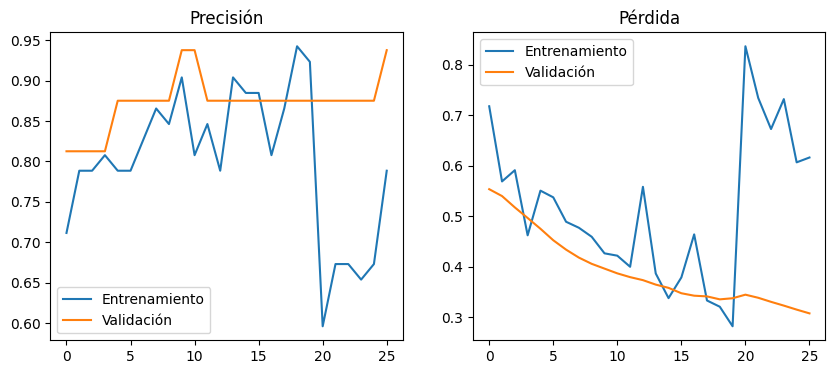

Modelo guardado en Drive.


In [ ]:
# Paso 7: Evaluación
print("\n Evaluando modelo final...")
loss, acc = model.evaluate(val_generator)
print(f"Pérdida de validación: {loss:.4f}")
print(f"Precisión de validación: {acc:.4f}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] + history_ft.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'] + history_ft.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'] + history_ft.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()
plt.show()

model.save('/content/drive/MyDrive/modelo_reconocimiento_facial2.h5')
print("Modelo guardado en Drive.")

In [ ]:
import random
from tensorflow.keras.utils import load_img, img_to_array

def mostrar_predicciones(model, data_dir, num_fotos=5):
    clases = list(train_generator.class_indices.keys())
    rutas = []

    # Obtener rutas de imágenes aleatorias
    for clase in clases:
        carpeta = os.path.join(data_dir, clase)
        imagenes = os.listdir(carpeta)
        for img in imagenes:
            rutas.append(os.path.join(carpeta, img))




In [ ]:
def mostrar_predicciones(model, data_dir, img_size=(224,224), num_fotos=5):
    clases = list(train_generator.class_indices.keys())
    rutas = []

    # Obtener rutas de imágenes aleatorias del dataset
    for clase in clases:
        carpeta = os.path.join(data_dir, clase)
        imagenes = os.listdir(carpeta)
        for img in imagenes:
            rutas.append(os.path.join(carpeta, img))

    # Seleccionar 5 imágenes random
    seleccion = random.sample(rutas, num_fotos)

    plt.figure(figsize=(15, 6))

    for i, ruta in enumerate(seleccion):
        # Cargar imagen
        img = load_img(ruta, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predicción
        pred = model.predict(img_array)
        pred_class = np.argmax(pred)
        conf = np.max(pred) * 100
        label = clases[pred_class]

        # Mostrar imagen + predicción
        plt.subplot(1, num_fotos, i+1)
        plt.imshow(load_img(ruta))
        plt.title(f"{label}\n{conf:.1f}%")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


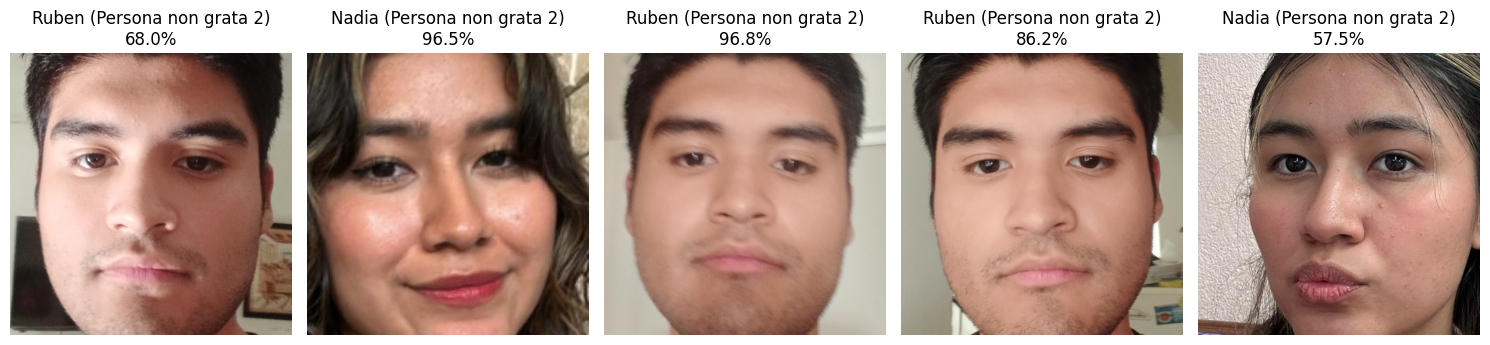

In [ ]:
mostrar_predicciones(model,
                     data_dir="/content/drive/MyDrive/base_recortada2",
                     img_size=(224,224),
                     num_fotos=5)